# **Initialization**

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# **Data Preprocessing**

In [125]:
# Load the dataset
file_path = 'Gender IDN.csv'
dataset = pd.read_csv(file_path)

# Remove the first row which contains repeated column headers
dataset = dataset.drop(0).reset_index(drop=True)

# Set the correct column names
dataset.columns = ['Country Name', 'Country ISO3', 'Year', 'Indicator Name', 'Indicator Code', 'Value']

# Convert the 'Year' and 'Value' columns to appropriate data types
dataset['Year'] = pd.to_numeric(dataset['Year'], errors='coerce')  # Convert to numeric, setting errors='coerce' will convert invalid parsing to NaN
dataset = dataset.dropna(subset=['Year'])  # Drop rows where 'Year' could not be converted
dataset['Year'] = dataset['Year'].astype(int)  # Convert 'Year' to integer
dataset['Value'] = pd.to_numeric(dataset['Value'], errors='coerce')  # Convert 'Value' to numeric

# Pivot the dataset to have years as rows and indicators as columns
normalized_dataset = dataset.pivot_table(index=['Year'], 
                                         columns='Indicator Name', 
                                         values='Value').reset_index()

# Export the normalized dataset to a new CSV file
# output_file_path = 'Normalized_Gender_IDN.csv'
# normalized_dataset.to_csv(output_file_path, index=False)
# print("Normalized dataset has been exported to", output_file_path)

print(normalized_dataset.columns)

Index(['Year',
       'A woman can apply for a passport in the same way as a man (1=yes; 0=no)',
       'A woman can be "head of household" in the same way as a man (1=yes; 0=no)',
       'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
       'A woman can get a job in the same way as a man (1=yes; 0=no)',
       'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
       'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
       'A woman can register a business in the same way as a man (1=yes; 0=no)',
       'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
       'A woman can travel outside her home in the same way as a man (1=yes; 0=no)',
       ...
       'Women who believe a husband is justified in beating his wife when she refuses sex with him (%)',
       'Women who believe a wife is justified refusing sex with her husband for all of the reasons (%)',
       'Women who believe a wif

# **EDA**

## EDA Preprocess

In [126]:
# Load the normalized dataset
file_path = 'Imputed_Indicators_2.csv'
normalized_dataset = pd.read_csv(file_path)

# Define indicators
indicators = {
    'Adjusted net enrollment rate, primary': [
        'Adjusted net enrollment rate, primary, female (% of primary school age children)',
        'Adjusted net enrollment rate, primary, male (% of primary school age children)'
    ],
    'School enrollment, preprimary': [
        'School enrollment, preprimary, female (% gross)',
        'School enrollment, preprimary, male (% gross)'
    ],
    'School enrollment, primary (gross)': [
        'School enrollment, primary, female (% gross)',
        'School enrollment, primary, male (% gross)'
    ],
    'School enrollment, primary (net)': [
        'School enrollment, primary, female (% net)',
        'School enrollment, primary, male (% net)'
    ],
    'School enrollment, secondary (gross)': [
        'School enrollment, secondary, female (% gross)',
        'School enrollment, secondary, male (% gross)'
    ],
    'School enrollment, secondary (net)': [
        'School enrollment, secondary, female (% net)',
        'School enrollment, secondary, male (% net)'
    ],
    'School enrollment, tertiary': [
        'School enrollment, tertiary, female (% gross)',
        'School enrollment, tertiary, male (% gross)'
    ]
}

# Impute missing values using forward fill and backward fill
data_clean = normalized_dataset.fillna(method='ffill').fillna(method='bfill')

# Basic statistics
all_indicators = [indicator for sublist in indicators.values() for indicator in sublist]
data_stats = data_clean[all_indicators].describe()

# Calculate the disparity index for each pair of indicators
for key, value in indicators.items():
    if len(value) == 2:
        female_col = value[0]
        male_col = value[1]
        disparity_col = f'{key} Disparity'
        data_clean[disparity_col] = (data_clean[female_col] - data_clean[male_col]) / data_clean[male_col] * 100

# Calculate the disparity index for each set of indicators with multiple pairs
multi_pairs = {
    'School enrollment, primary (gross)': [
        'School enrollment, primary, female (% gross)',
        'School enrollment, primary, male (% gross)'
    ],
    'School enrollment, primary (net)': [
        'School enrollment, primary, female (% net)',
        'School enrollment, primary, male (% net)'
    ],
    'School enrollment, secondary (gross)': [
        'School enrollment, secondary, female (% gross)',
        'School enrollment, secondary, male (% gross)'
    ],
    'School enrollment, secondary (net)': [
        'School enrollment, secondary, female (% net)',
        'School enrollment, secondary, male (% net)'
    ]
}

for key, value in multi_pairs.items():
    female_col = value[0]
    male_col = value[1]
    disparity_col = f'{key} Disparity'
    data_clean[disparity_col] = (data_clean[female_col] - data_clean[male_col]) / data_clean[male_col] * 100

# Show the disparity index
disparity_columns = [f'{key} Disparity' for key in indicators.keys() if len(indicators[key]) == 2]
disparity_columns += [f'{key} Disparity' for key in multi_pairs.keys()]
disparity_data = data_clean[['Year'] + disparity_columns]

# Save the cleaned dataset with disparity index
output_file_path = 'Cleaned_Gender_IDN_with_Disparity.csv'
disparity_data.to_csv(output_file_path, index=False)
print(f'Cleaned dataset with disparity index has been exported to {output_file_path}')

Cleaned dataset with disparity index has been exported to Cleaned_Gender_IDN_with_Disparity.csv


C:\Users\IrfanFR\AppData\Local\Temp\ipykernel_30524\163063092.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean = normalized_dataset.fillna(method='ffill').fillna(method='bfill')


## Visualize the trends over time

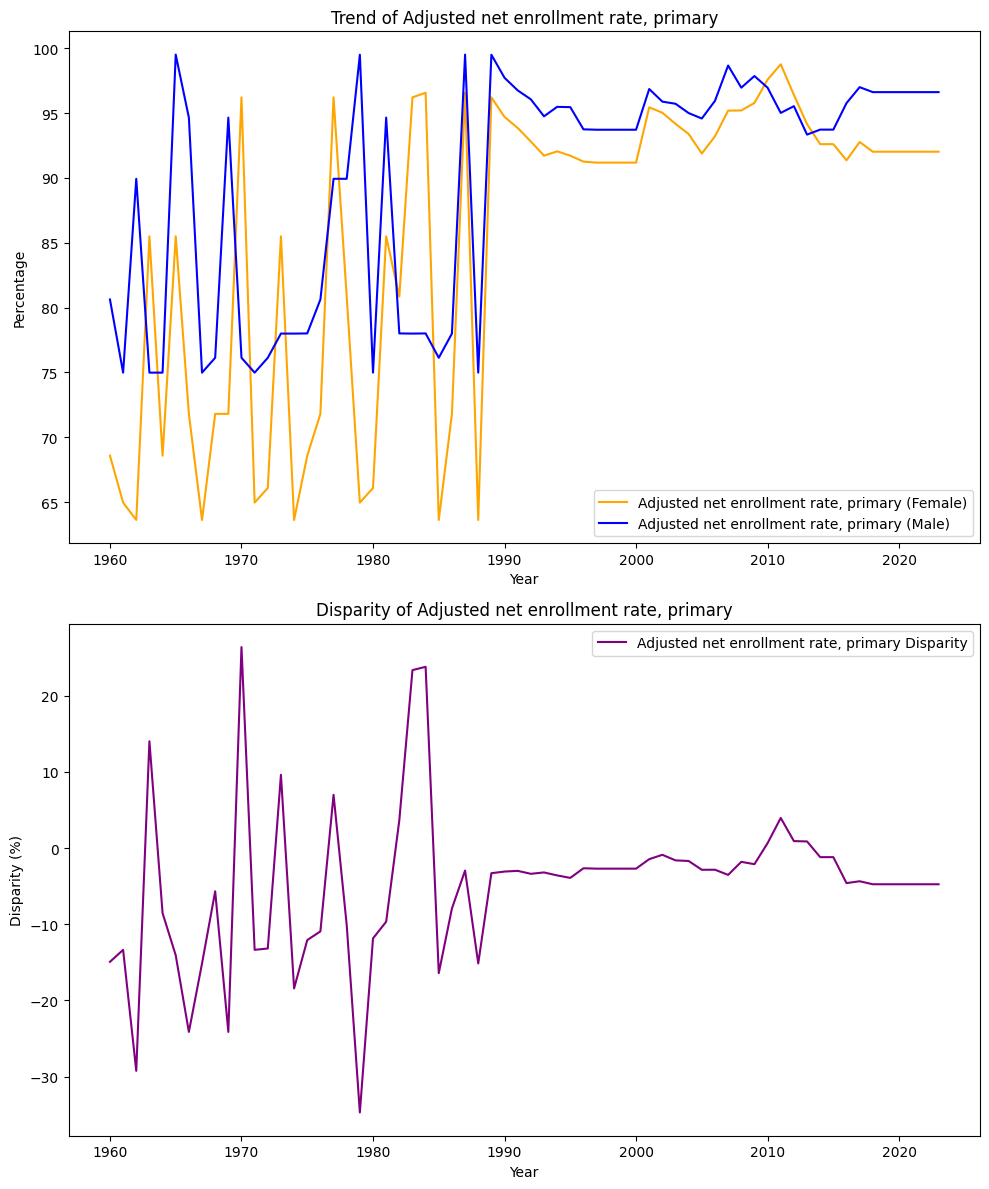

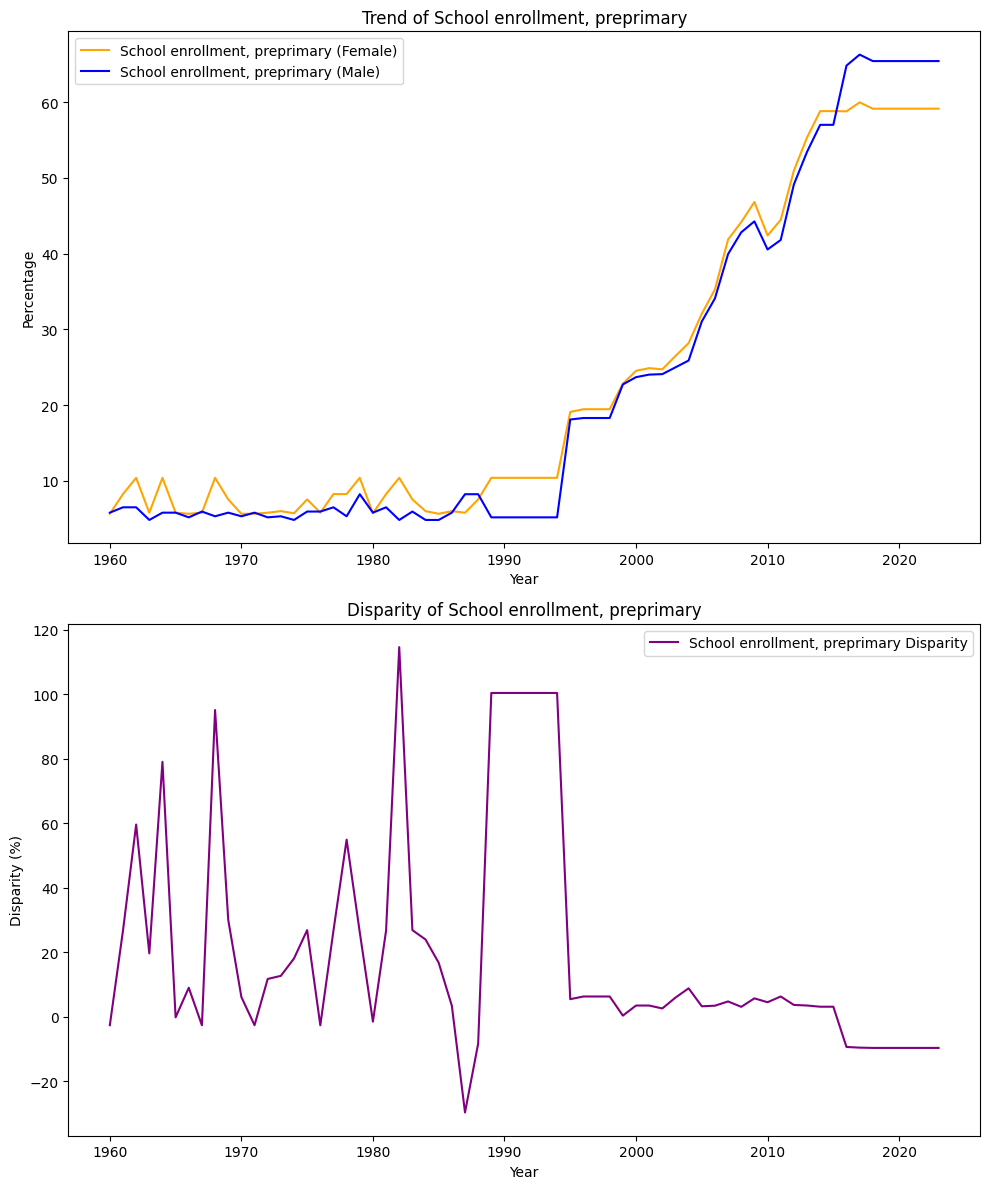

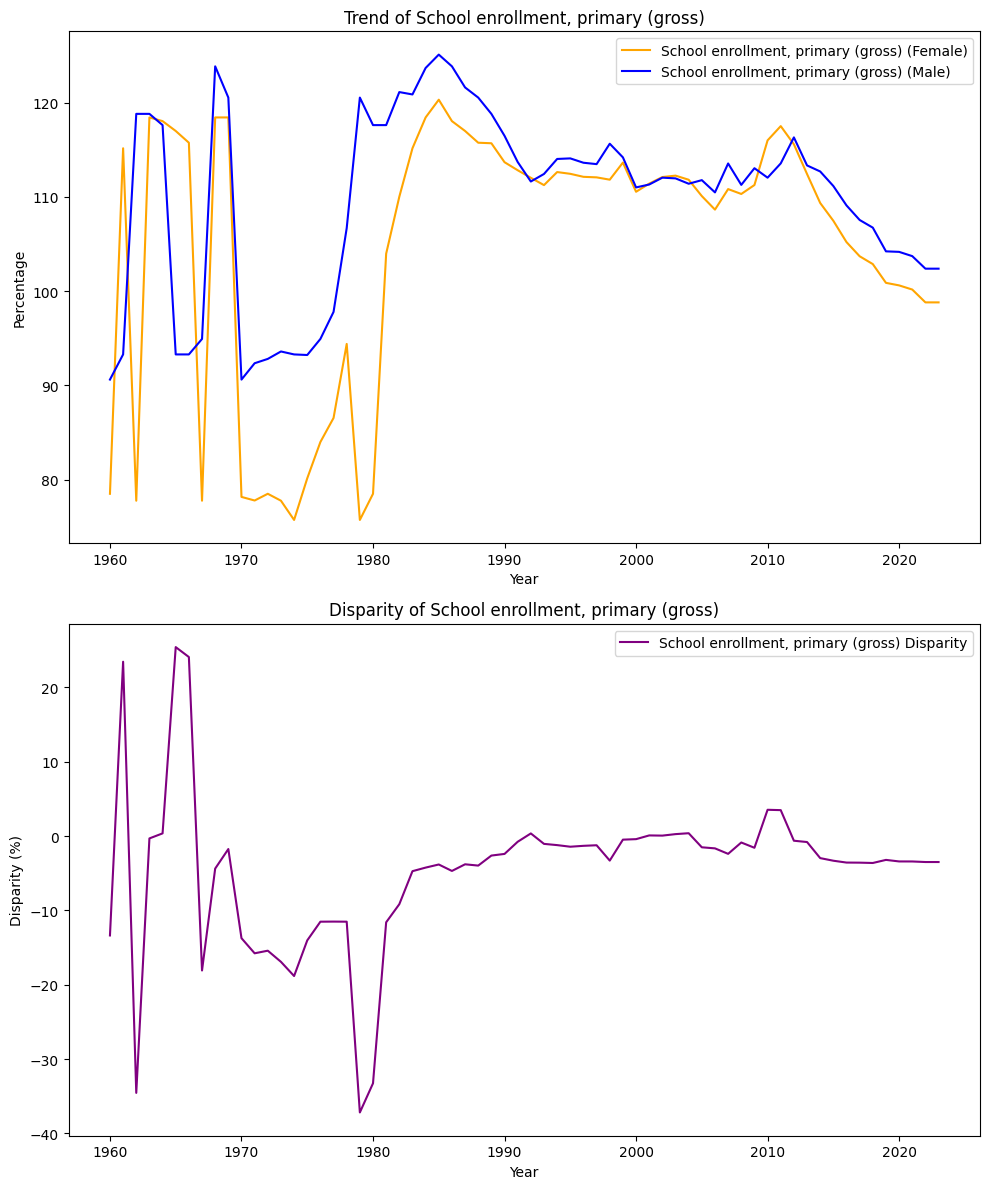

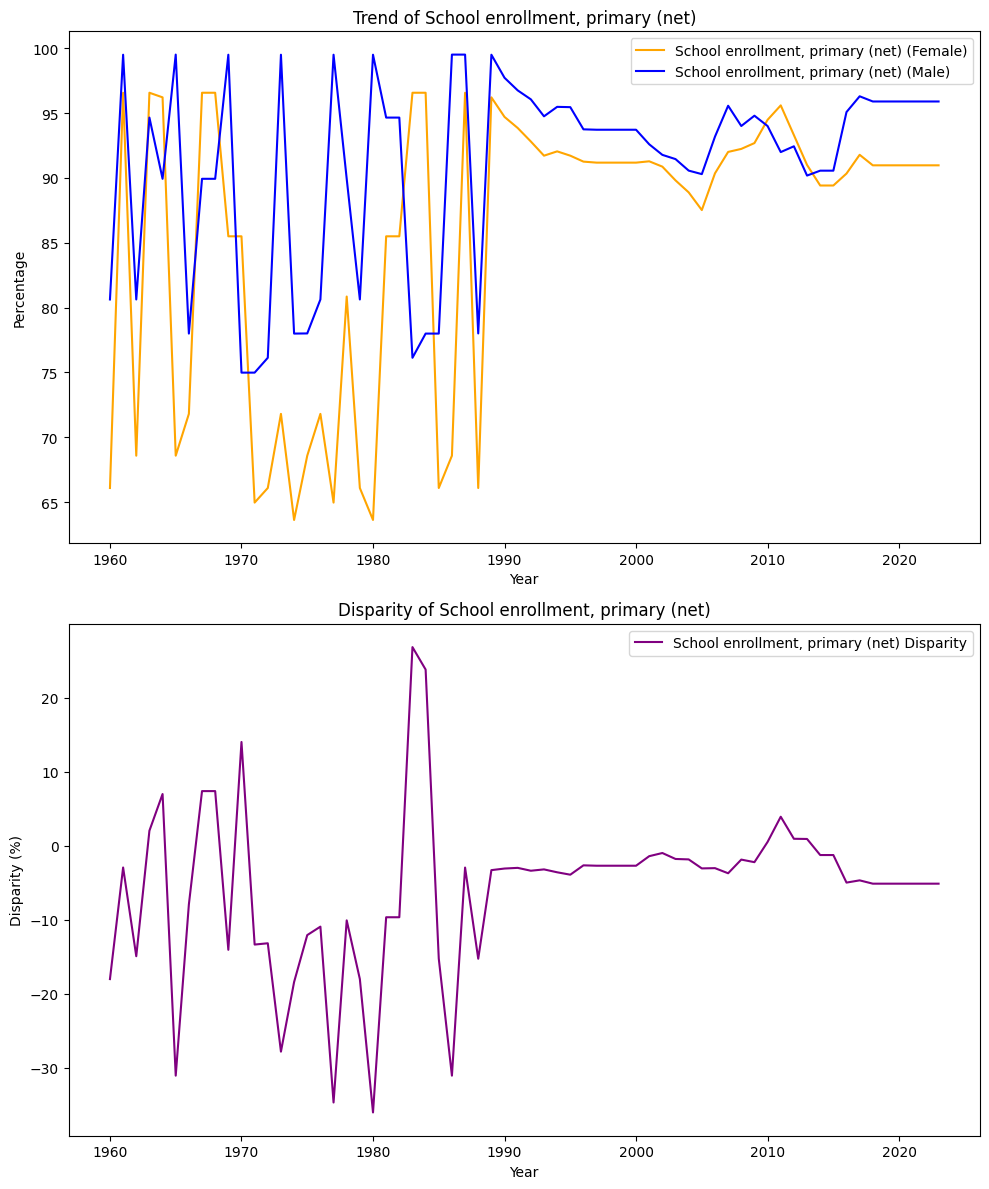

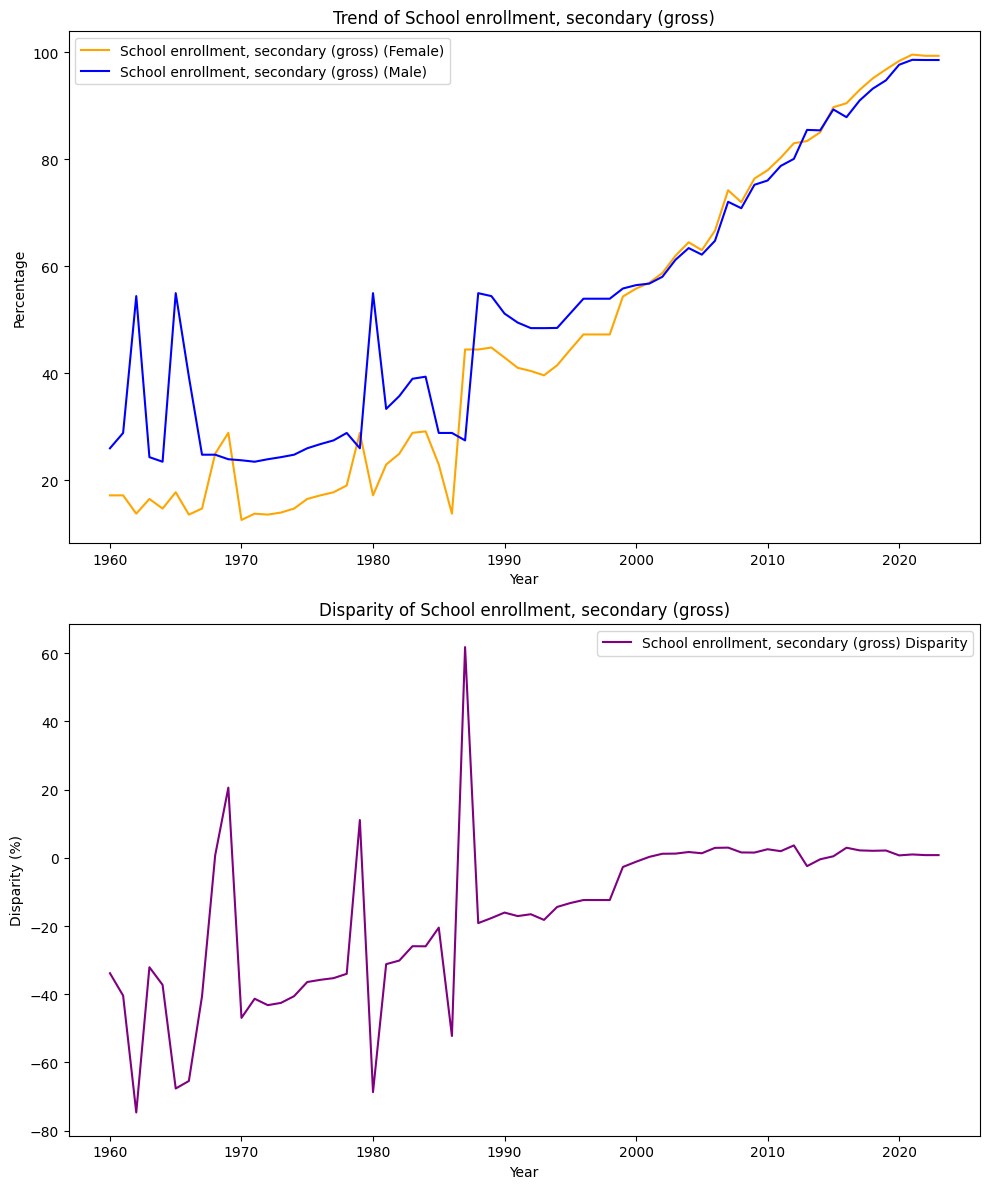

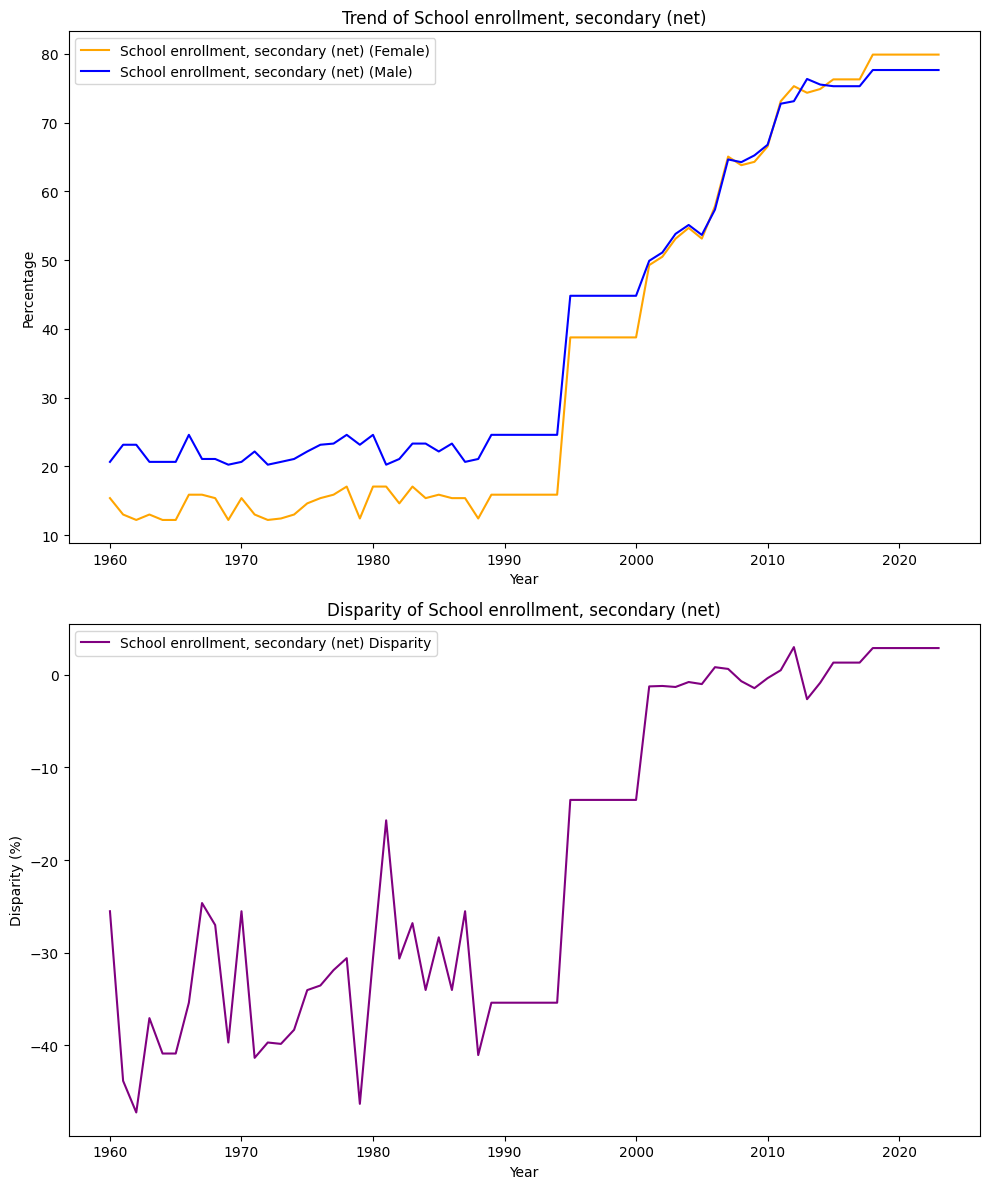

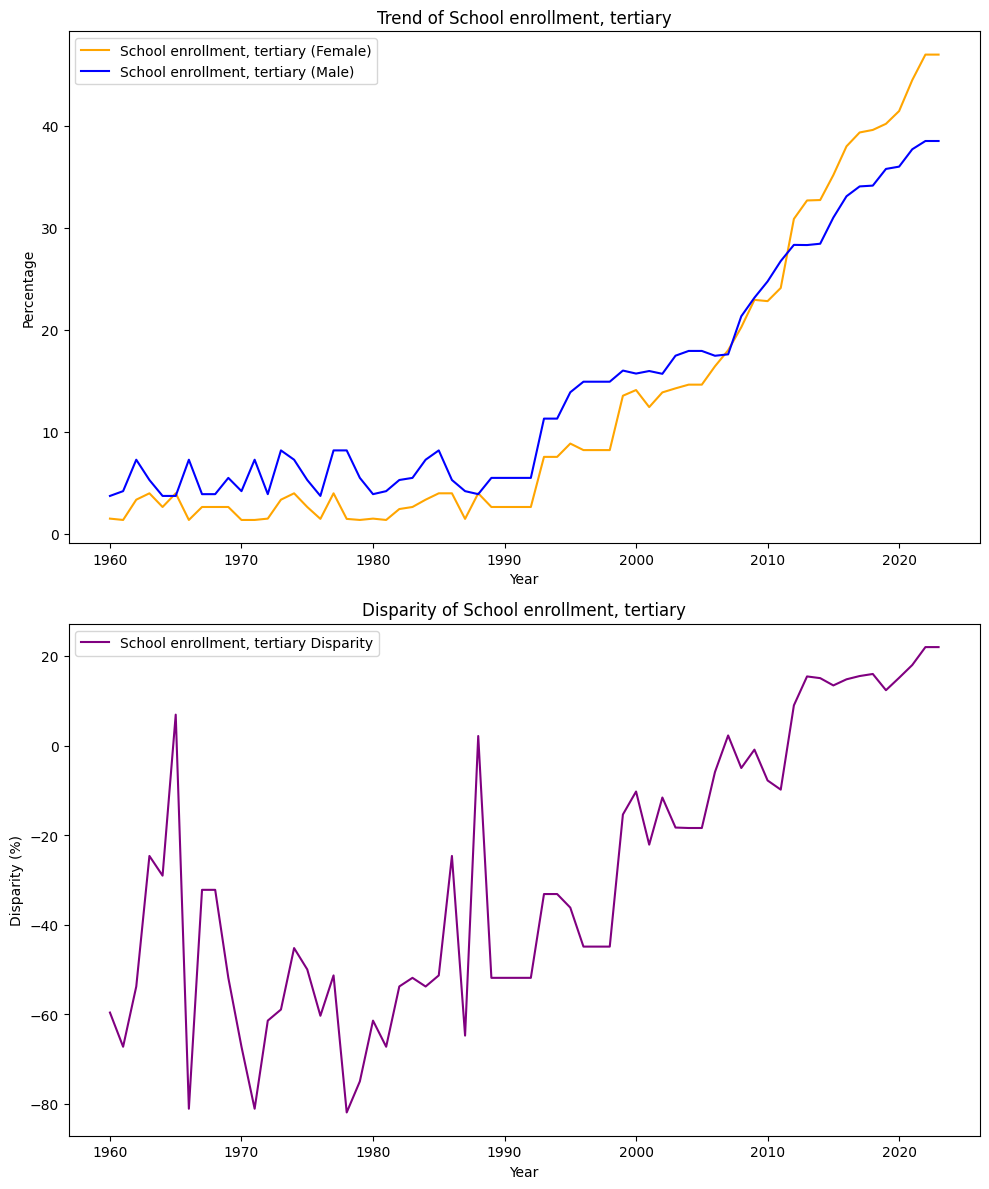

In [127]:
for key, value in indicators.items():
    if len(value) == 2:
        # Create a figure with 2 subplots
        fig, axes = plt.subplots(2, 1, figsize=(10, 12))

        # Trend Plot
        sns.lineplot(ax=axes[0], data=data_clean, x='Year', y=value[0], label=f'{key} (Female)', color='orange')
        sns.lineplot(ax=axes[0], data=data_clean, x='Year', y=value[1], label=f'{key} (Male)', color='blue')
        axes[0].set_title(f'Trend of {key}')
        axes[0].set_xlabel('Year')
        axes[0].set_ylabel('Percentage')
        axes[0].legend()

        # Disparity Plot (assuming disparity data is correctly calculated)
        disparity_col = f'{key} Disparity'
        sns.lineplot(ax=axes[1], data=data_clean, x='Year', y=disparity_col, label=disparity_col, color='purple')
        axes[1].set_title(f'Disparity of {key}')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Disparity (%)')
        axes[1].legend()

        # Adjust layout and show the plot
        plt.tight_layout()
        plt.show()


## Correlation Heatmap

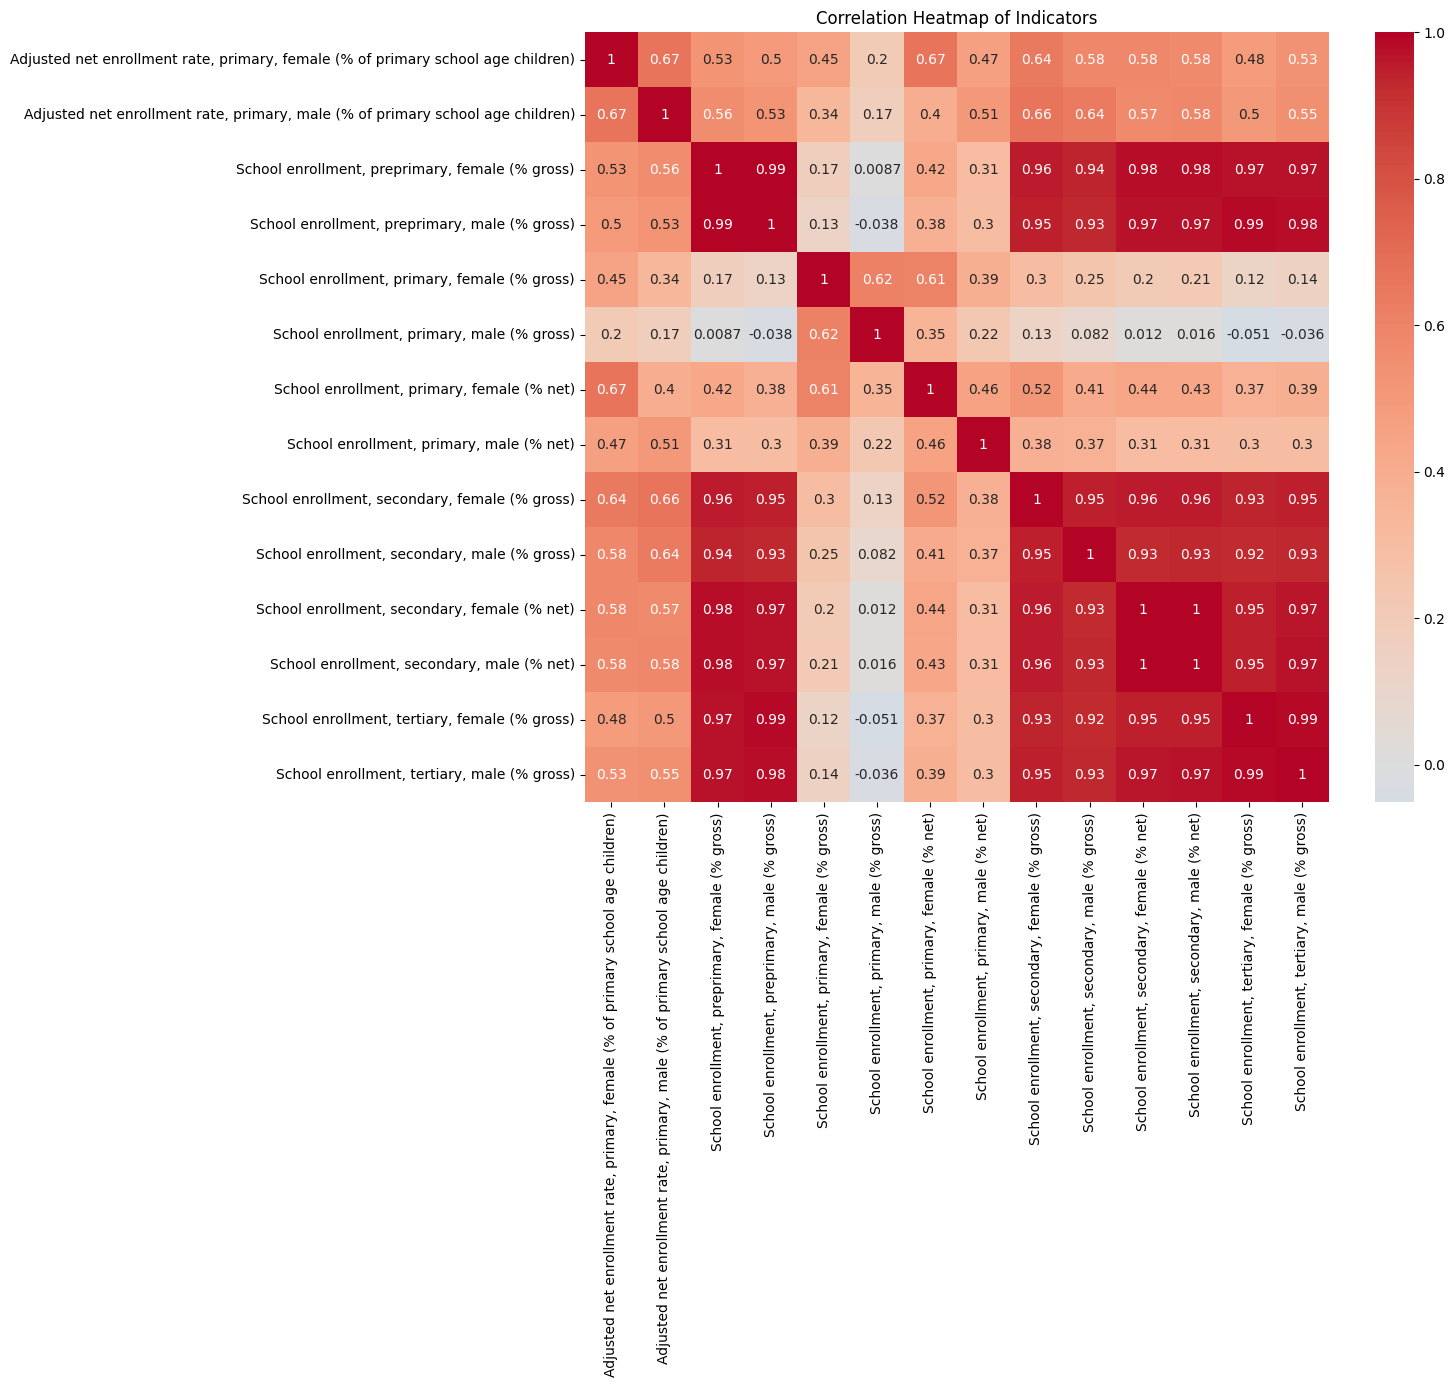

In [128]:
correlation_matrix = data_clean[[indicator for sublist in indicators.values() for indicator in sublist]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Indicators')
plt.show()

## Summary statistics table

In [129]:
summary_stats = data_clean[[indicator for sublist in indicators.values() for indicator in sublist]].describe().transpose()
print(summary_stats)


                                                    count        mean  \
Adjusted net enrollment rate, primary, female (...   64.0   85.344187   
Adjusted net enrollment rate, primary, male (% ...   64.0   89.707654   
School enrollment, preprimary, female (% gross)      64.0   23.186559   
School enrollment, preprimary, male (% gross)        64.0   22.428508   
School enrollment, primary, female (% gross)         64.0  104.691475   
School enrollment, primary, male (% gross)           64.0  109.819062   
School enrollment, primary, female (% net)           64.0   85.596041   
School enrollment, primary, male (% net)             64.0   91.050409   
School enrollment, secondary, female (% gross)       64.0   47.030729   
School enrollment, secondary, male (% gross)         64.0   52.966806   
School enrollment, secondary, female (% net)         64.0   36.417746   
School enrollment, secondary, male (% net)           64.0   41.006475   
School enrollment, tertiary, female (% gross)      

# **Prediciton Model**

## Data and Features Initialization

In [130]:
# Load the cleaned dataset with disparity index
file_path_disparity = 'Cleaned_Gender_IDN_with_Disparity.csv'
data_disparity = pd.read_csv(file_path_disparity)

# Load the original normalized dataset
file_path_original = 'Imputed_Indicators_2.csv'
data_original = pd.read_csv(file_path_original)

# Clean column names in the original dataset
data_original.columns = data_original.columns.str.strip()

# Define features (X) based on columns in the original dataset
features = [
    'Adjusted net enrollment rate, primary, female (% of primary school age children)',
    'Adjusted net enrollment rate, primary, male (% of primary school age children)',
    'School enrollment, preprimary, female (% gross)',
    'School enrollment, preprimary, male (% gross)',
    'School enrollment, primary, female (% gross)',
    'School enrollment, primary, female (% net)',
    'School enrollment, primary, male (% gross)',
    'School enrollment, primary, male (% net)',
    'School enrollment, secondary, female (% gross)',
    'School enrollment, secondary, female (% net)',
    'School enrollment, secondary, male (% gross)',
    'School enrollment, secondary, male (% net)',
    'School enrollment, tertiary, female (% gross)',
    'School enrollment, tertiary, male (% gross)'
]

# Define targets (disparity indices) based on columns in the disparity dataset
targets = [
    'Adjusted net enrollment rate, primary Disparity',
    'School enrollment, preprimary Disparity',
    'School enrollment, primary (gross) Disparity',
    'School enrollment, primary (net) Disparity',
    'School enrollment, secondary (gross) Disparity',
    'School enrollment, secondary (net) Disparity',
    'School enrollment, tertiary Disparity'
]

# Impute missing values in the original dataset
imputer = SimpleImputer(strategy='mean')
data_original_imputed = pd.DataFrame(imputer.fit_transform(data_original), columns=data_original.columns)

# Verify that all features are present in the dataset
missing_features = [feature for feature in features if feature not in data_original_imputed.columns]
if missing_features:
    print(f"Missing features in the dataset: {missing_features}")
else:
    print("All features are present.")

# Split the data into training (1960-2010) and testing sets (2011-2022)
train_data = data_original_imputed[data_original_imputed['Year'] <= 2010]
test_data = data_original_imputed[data_original_imputed['Year'] > 2010]

# Corresponding disparity indices
train_disparity = data_disparity[data_disparity['Year'] <= 2010]
test_disparity = data_disparity[data_disparity['Year'] > 2010]

All features are present.


## Random Forest

Model for Adjusted net enrollment rate, primary Disparity:
  Mean Squared Error: 4.548032823848837
  R-squared: 0.442392939628818



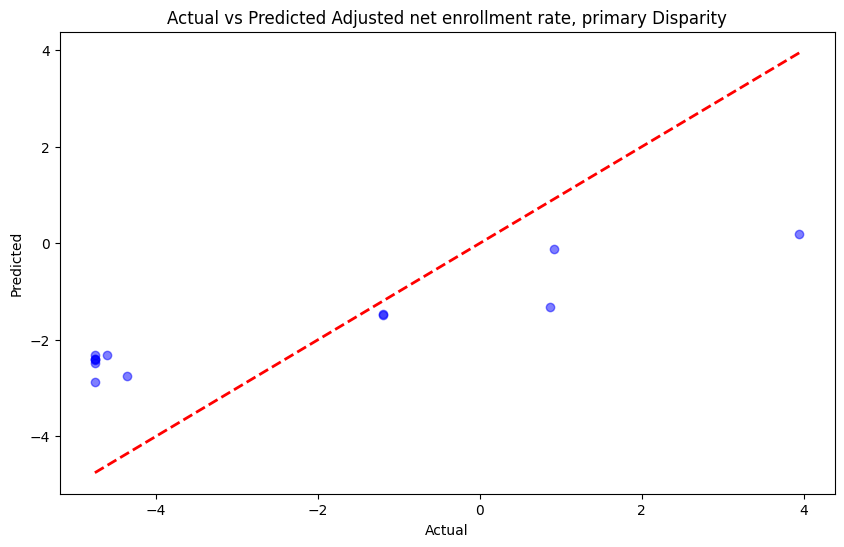

Model for School enrollment, preprimary Disparity:
  Mean Squared Error: 244.59155484816412
  R-squared: -4.559922119876644



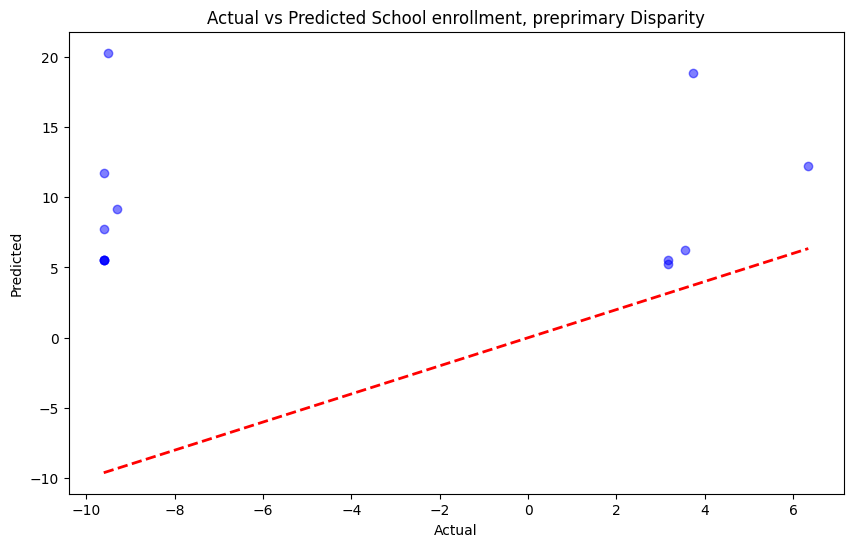

Model for School enrollment, primary (gross) Disparity:
  Mean Squared Error: 106.53263328998675
  R-squared: -26.260680631469544



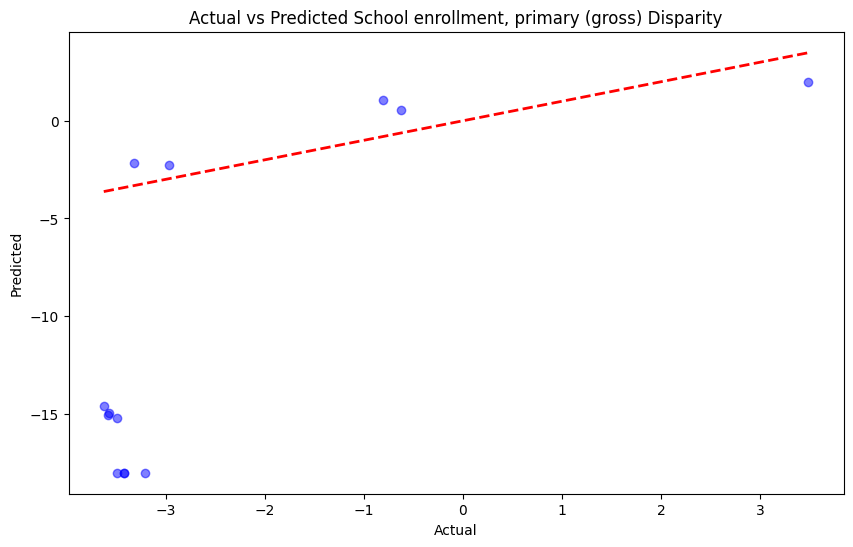

Model for School enrollment, primary (net) Disparity:
  Mean Squared Error: 4.538507809196466
  R-squared: 0.5015381905887273



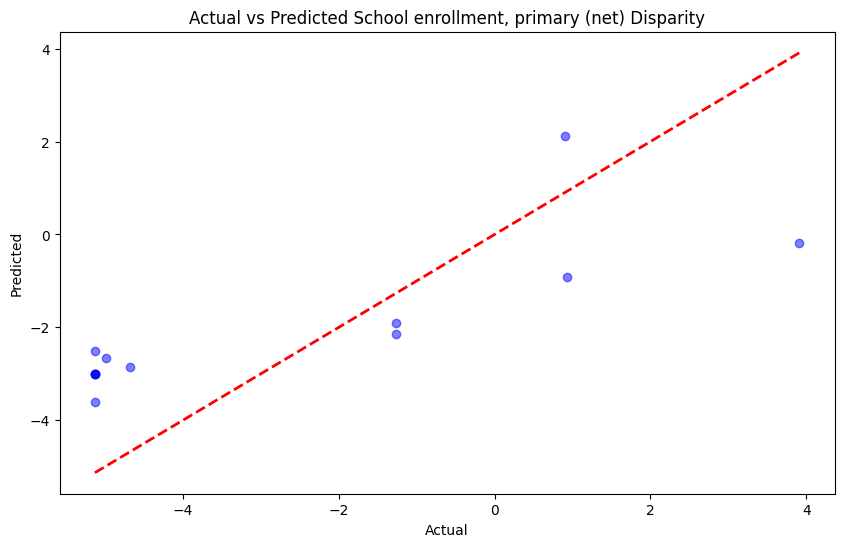

Model for School enrollment, secondary (gross) Disparity:
  Mean Squared Error: 25.905176603162435
  R-squared: -10.506077670836339



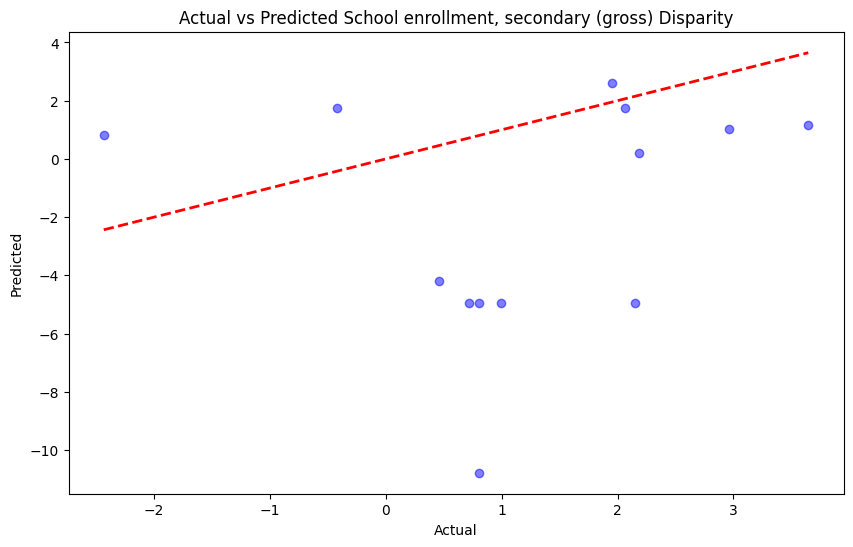

Model for School enrollment, secondary (net) Disparity:
  Mean Squared Error: 83.06654057093235
  R-squared: -27.964074717220605



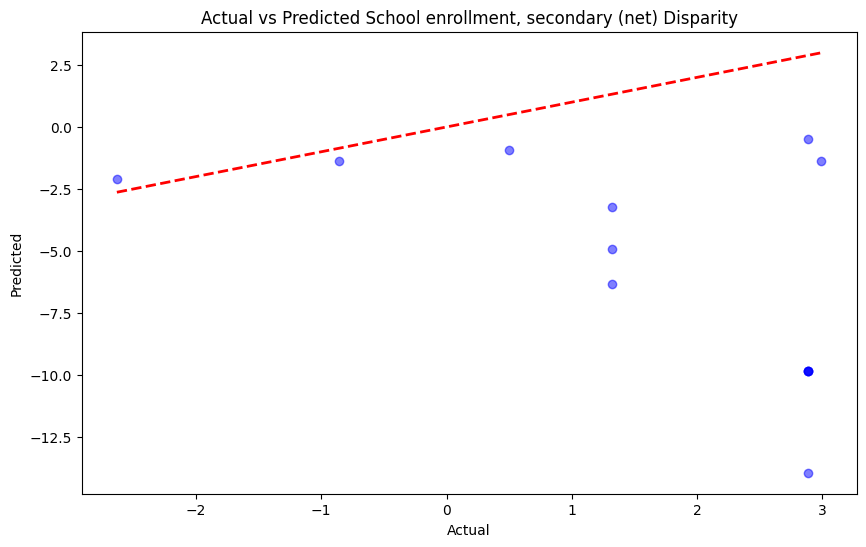

Model for School enrollment, tertiary Disparity:
  Mean Squared Error: 949.0931160513175
  R-squared: -15.42517350450235



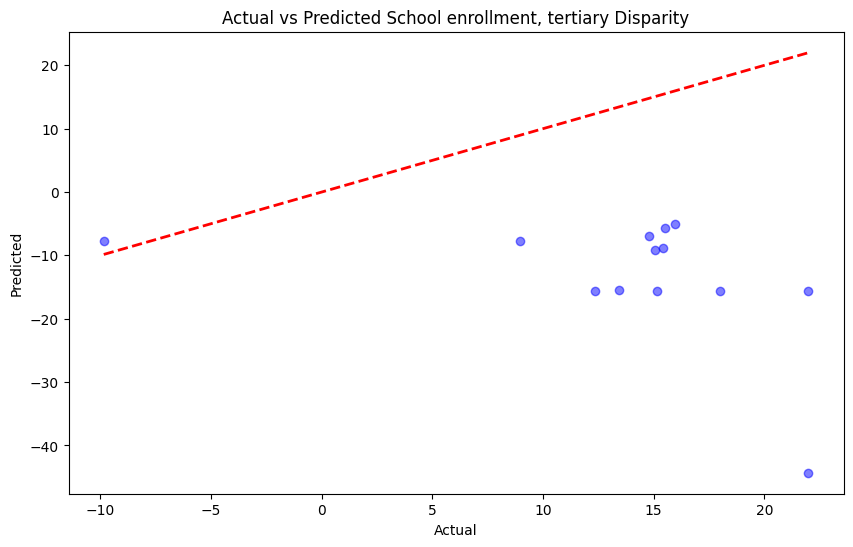

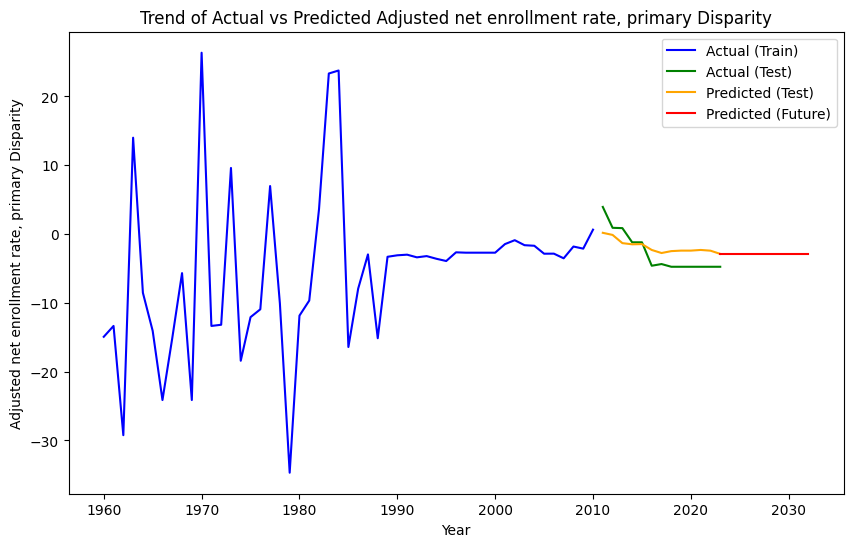

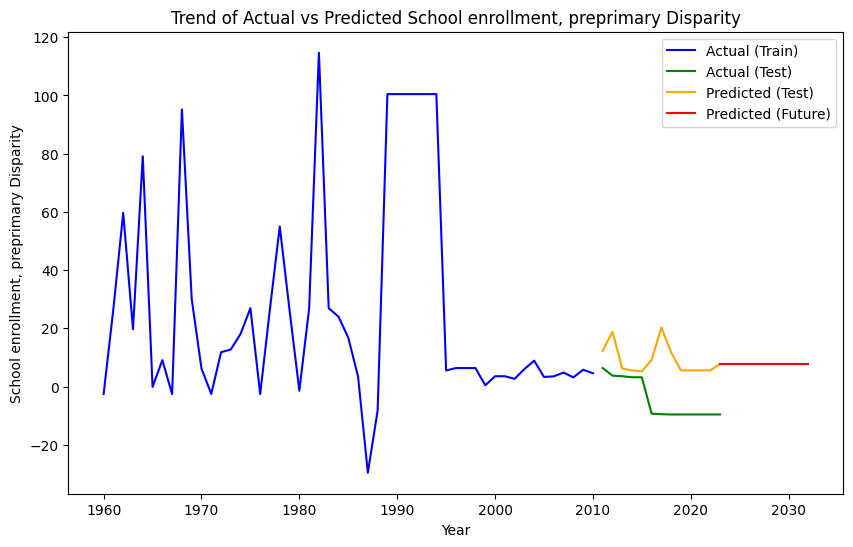

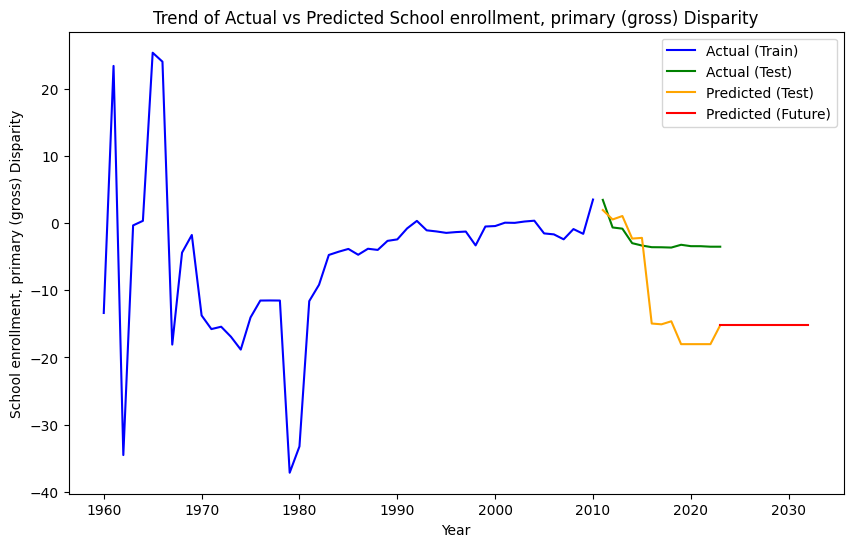

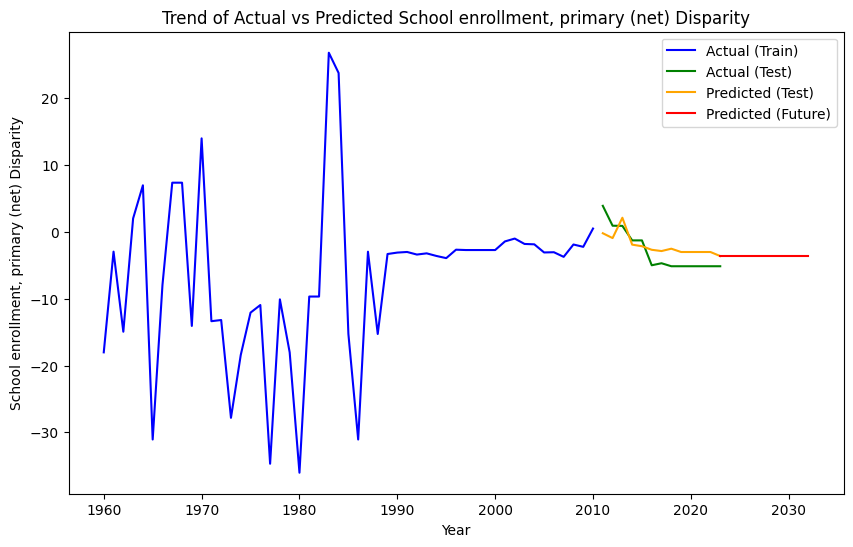

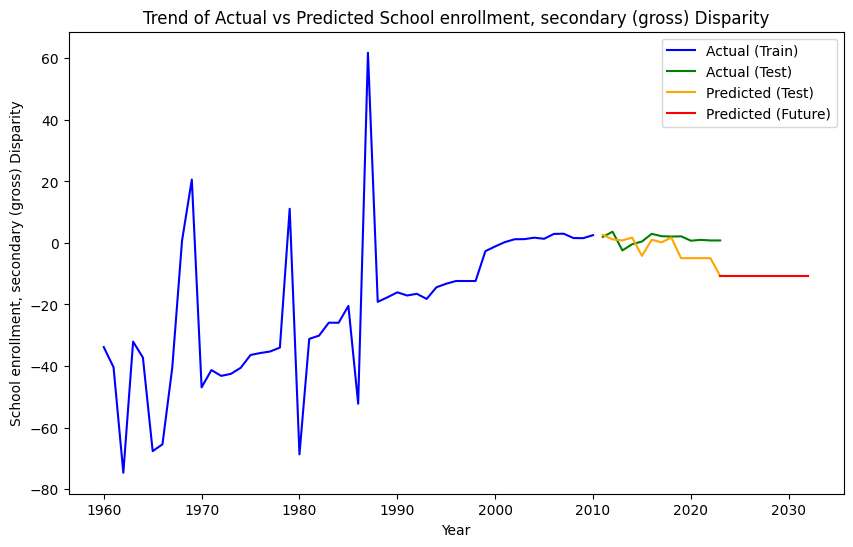

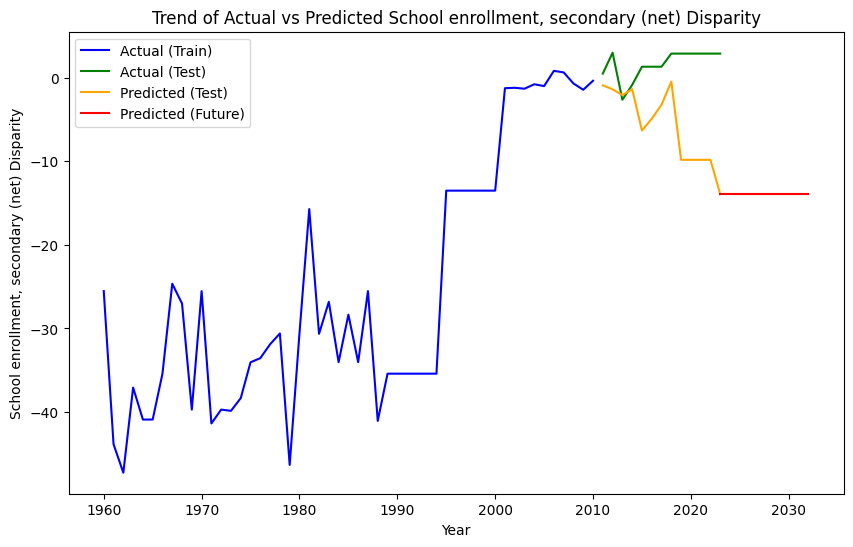

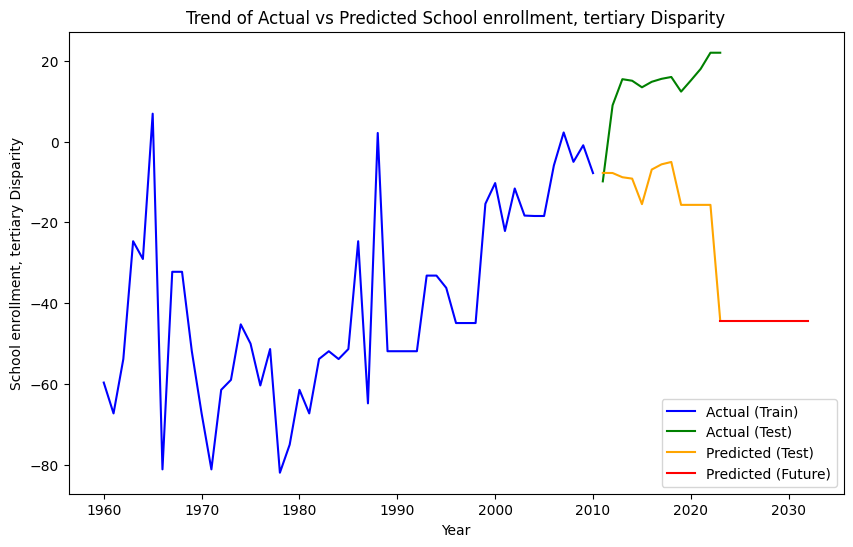

In [131]:
# Create a Random Forest model for each target (disparity index)
models = {}
predictions = {}
for target in targets:
    # Prepare features and target
    X_train = train_data[features]
    y_train = train_disparity[target]
    X_test = test_data[features]
    y_test = test_disparity[target]

    # Train the Random Forest regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    models[target] = model

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    predictions[target] = y_pred

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model for {target}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')
    print()

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted {target}')
    plt.show()

# Predicting future disparities using rolling window approach

# Generate future years
future_years = np.arange(2023, 2033)

# Make predictions for future years
future_predictions = {}
for target in targets:
    model = models[target]
    current_year = test_data['Year'].max()
    X_future = test_data[features].iloc[-1].copy().to_frame().T
    future_pred = []
    
    for year in future_years:
        # Predict the disparity for the next year
        pred = model.predict(X_future)[0]
        future_pred.append(pred)
        
        # Update the features for the next prediction (use a simplistic approach here)
        for feature in features:
            X_future[feature] = X_future[feature].values[0]  # Use the last known value for simplicity
    
    future_predictions[target] = future_pred

# Visualize the trend of predicted vs actual disparity index over time
for target in targets:
    plt.figure(figsize=(10, 6))
    plt.plot(train_disparity['Year'], train_disparity[target], label='Actual (Train)', color='blue')
    plt.plot(test_disparity['Year'], test_disparity[target], label='Actual (Test)', color='green')
    plt.plot(test_disparity['Year'], predictions[target], label='Predicted (Test)', color='orange')
    plt.plot(future_years, future_predictions[target], label='Predicted (Future)', color='red')
    plt.xlabel('Year')
    plt.ylabel(target)
    plt.title(f'Trend of Actual vs Predicted {target}')
    plt.legend()
    plt.show()

## Gradient Boosting

All features are present.
Model for Adjusted net enrollment rate, primary Disparity:
  Mean Squared Error: 4.992928085420104
  R-squared: 0.38784699667146627



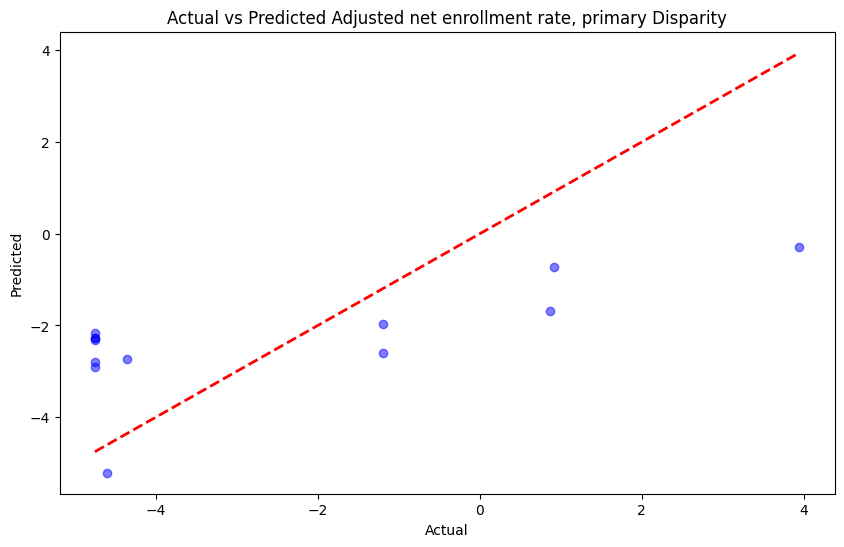

Model for School enrollment, preprimary Disparity:
  Mean Squared Error: 993.0597336978107
  R-squared: -21.57369345058853



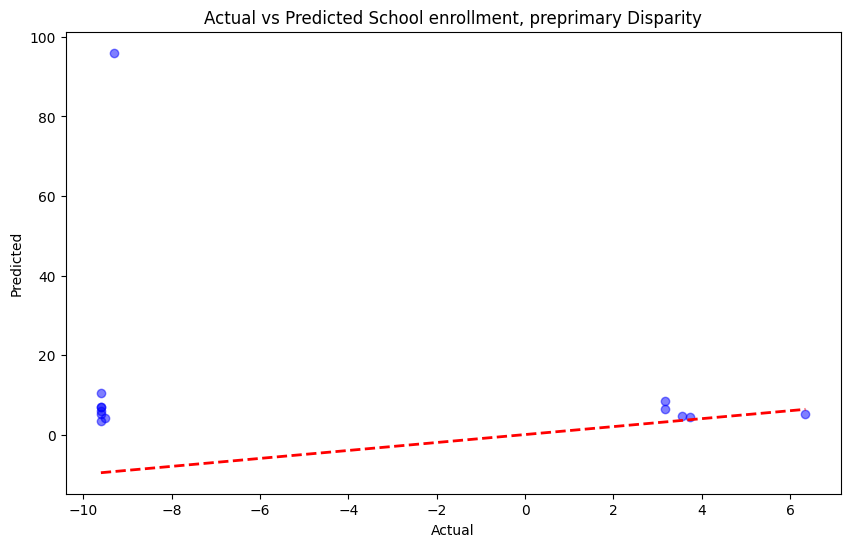

Model for School enrollment, primary (gross) Disparity:
  Mean Squared Error: 82.48751286905564
  R-squared: -20.10776458783843



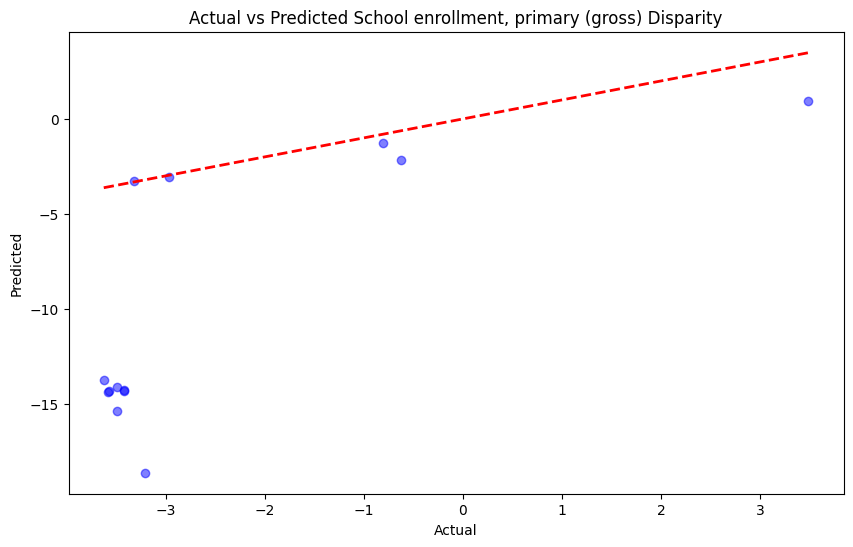

Model for School enrollment, primary (net) Disparity:
  Mean Squared Error: 8.184471348138619
  R-squared: 0.10110402608513136



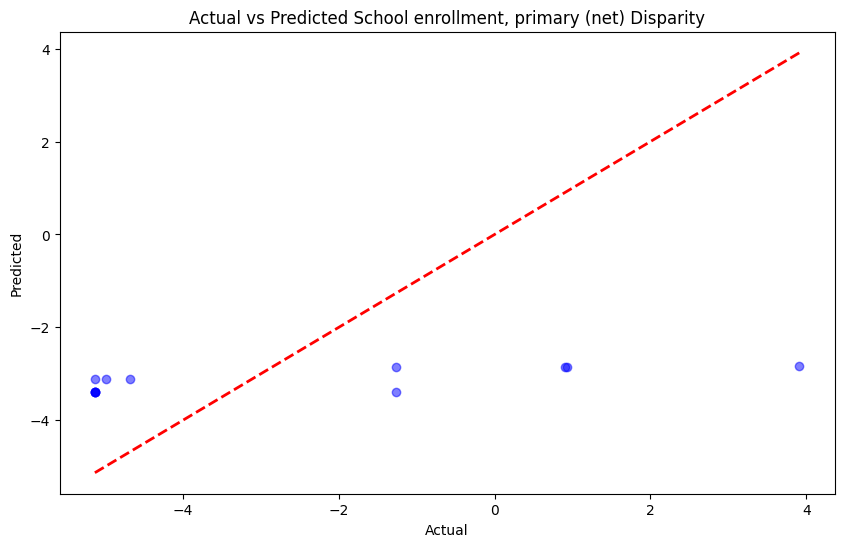

Model for School enrollment, secondary (gross) Disparity:
  Mean Squared Error: 13.122675767865788
  R-squared: -4.828585110507725



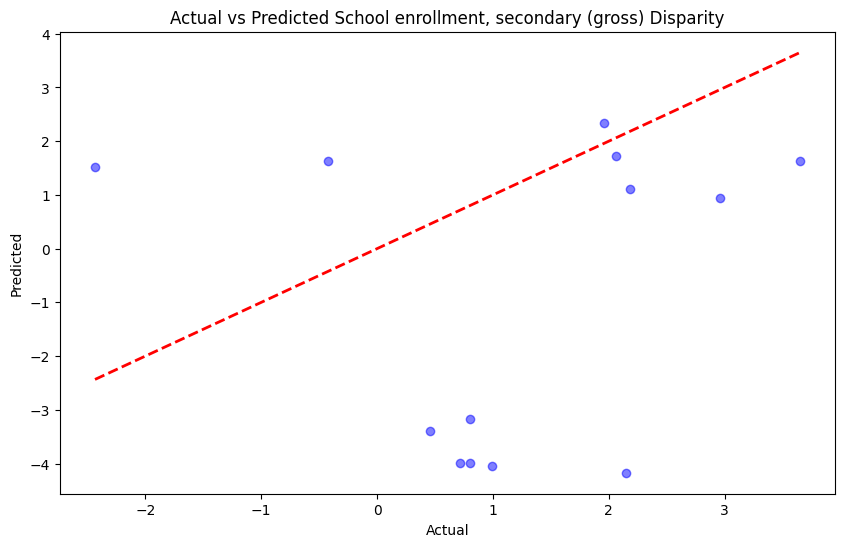

Model for School enrollment, secondary (net) Disparity:
  Mean Squared Error: 87.04545509738783
  R-squared: -29.351463391957587



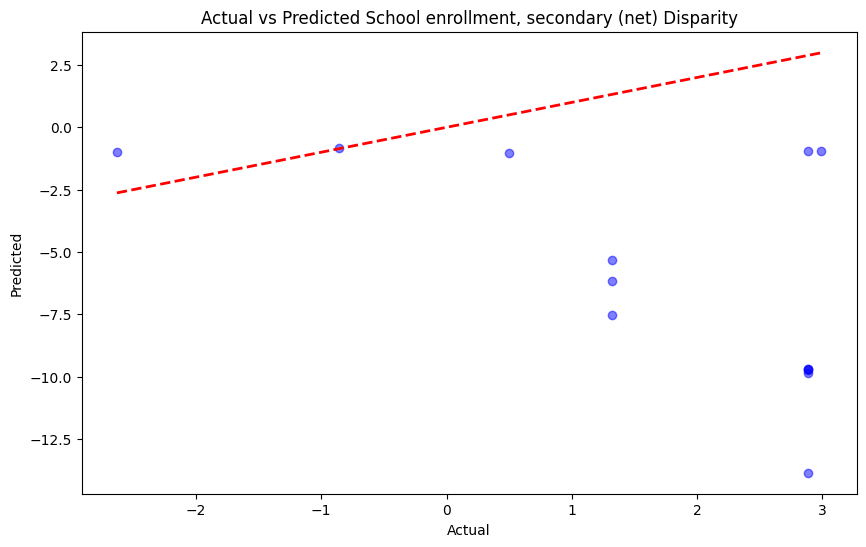

Model for School enrollment, tertiary Disparity:
  Mean Squared Error: 952.6673612371353
  R-squared: -15.487030024512674



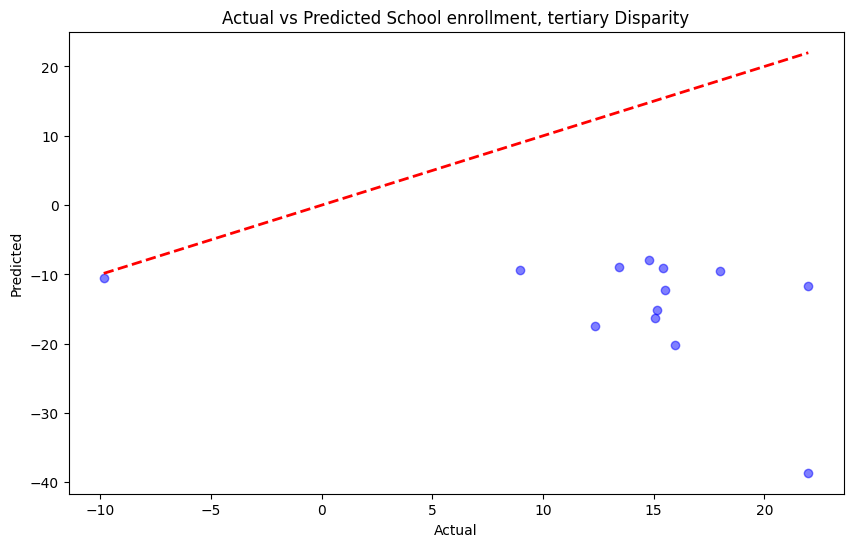

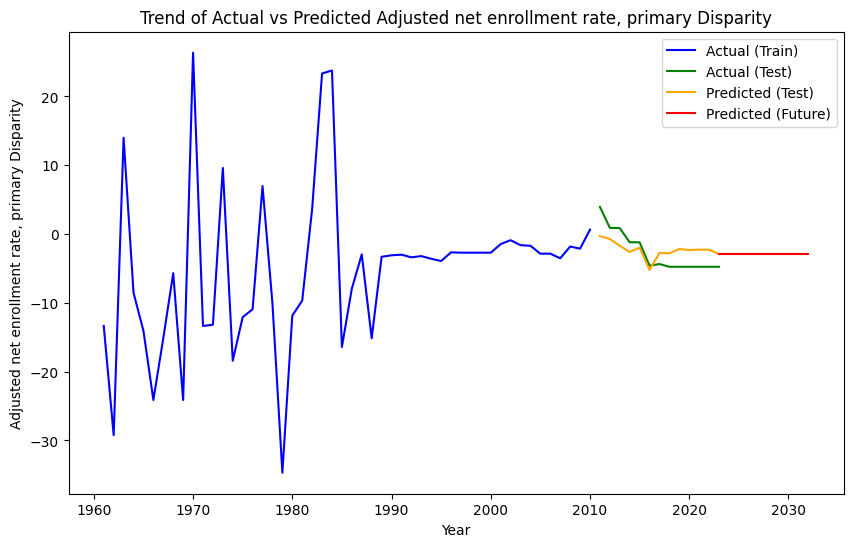

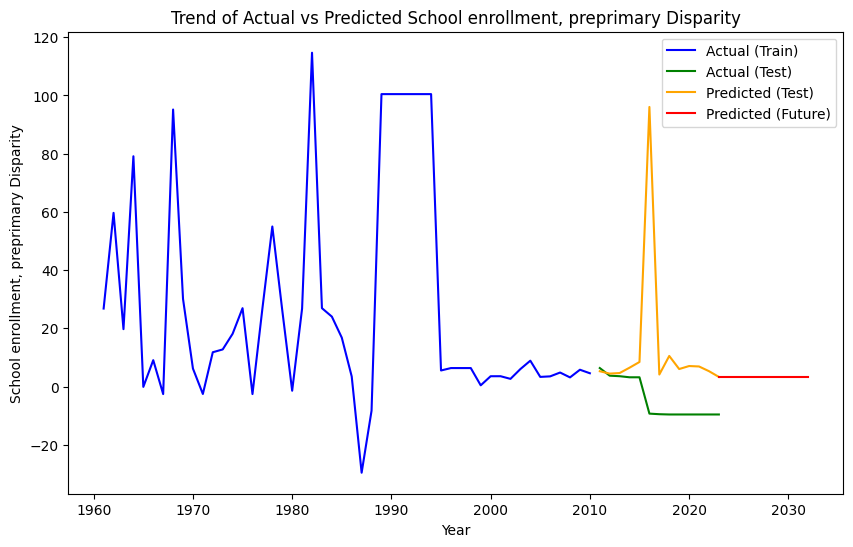

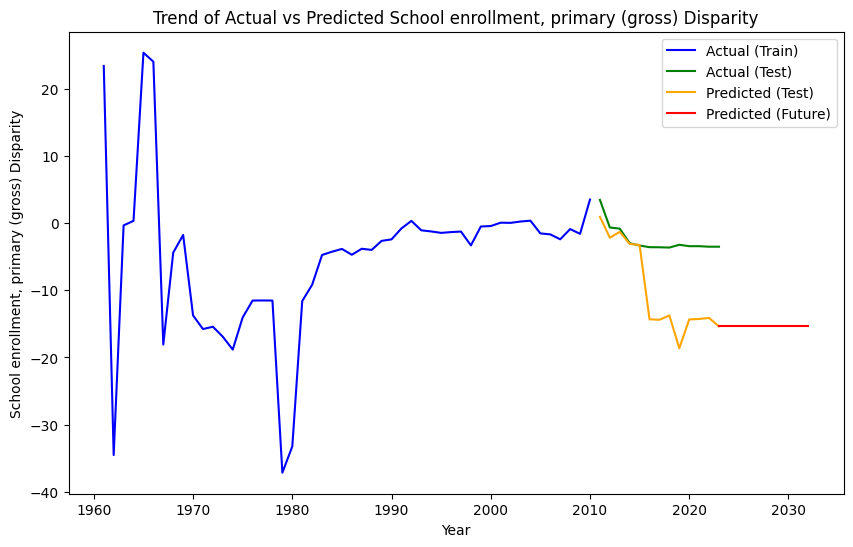

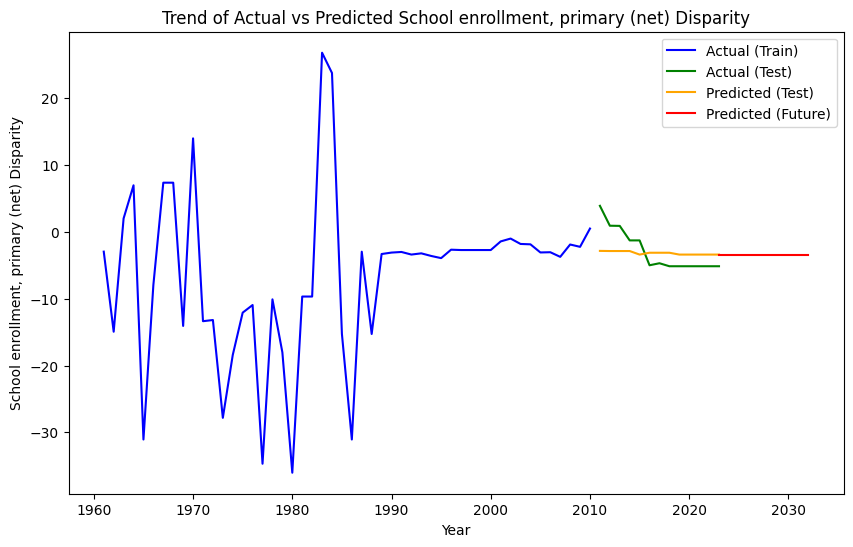

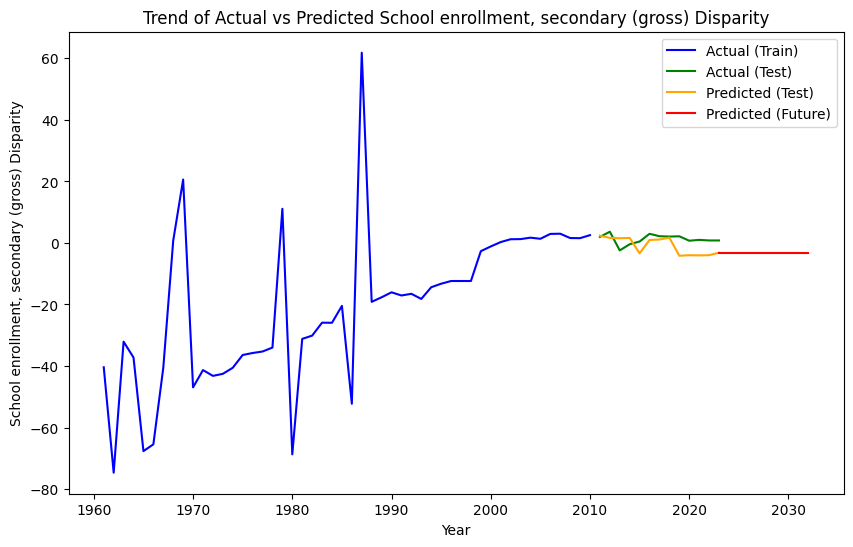

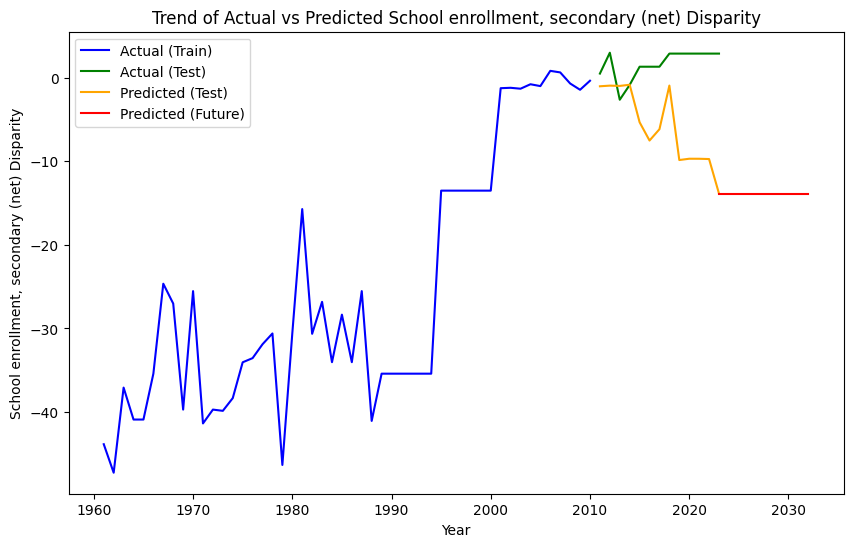

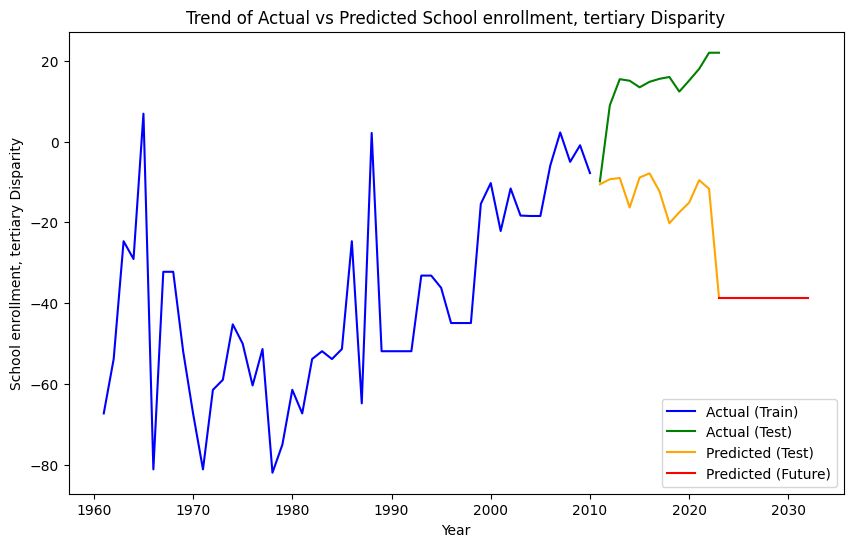

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the cleaned dataset with disparity index
file_path_disparity = 'Cleaned_Gender_IDN_with_Disparity.csv'
data_disparity = pd.read_csv(file_path_disparity)

# Load the original normalized dataset
file_path_original = 'Imputed_Indicators_2.csv'
data_original = pd.read_csv(file_path_original)

# Clean column names in the original dataset
data_original.columns = data_original.columns.str.strip()

# Define features (X) based on columns in the original dataset
features = [
    'Adjusted net enrollment rate, primary, female (% of primary school age children)',
    'Adjusted net enrollment rate, primary, male (% of primary school age children)',
    'School enrollment, preprimary, female (% gross)',
    'School enrollment, preprimary, male (% gross)',
    'School enrollment, primary, female (% gross)',
    'School enrollment, primary, female (% net)',
    'School enrollment, primary, male (% gross)',
    'School enrollment, primary, male (% net)',
    'School enrollment, secondary, female (% gross)',
    'School enrollment, secondary, female (% net)',
    'School enrollment, secondary, male (% gross)',
    'School enrollment, secondary, male (% net)',
    'School enrollment, tertiary, female (% gross)',
    'School enrollment, tertiary, male (% gross)'
]

# Define targets (disparity indices) based on columns in the disparity dataset
targets = [
    'Adjusted net enrollment rate, primary Disparity',
    'School enrollment, preprimary Disparity',
    'School enrollment, primary (gross) Disparity',
    'School enrollment, primary (net) Disparity',
    'School enrollment, secondary (gross) Disparity',
    'School enrollment, secondary (net) Disparity',
    'School enrollment, tertiary Disparity'
]

# Impute missing values in the original dataset
imputer = SimpleImputer(strategy='mean')
data_original_imputed = pd.DataFrame(imputer.fit_transform(data_original), columns=data_original.columns)

# Verify that all features are present in the dataset
missing_features = [feature for feature in features if feature not in data_original_imputed.columns]
if missing_features:
    print(f"Missing features in the dataset: {missing_features}")
else:
    print("All features are present.")

# Feature Engineering: Add year-over-year changes as features
for feature in features:
    data_original_imputed[f'{feature} YoY Change'] = data_original_imputed[feature].pct_change()

# Drop the first row because of NaN values in YoY change features
data_original_imputed = data_original_imputed.dropna().reset_index(drop=True)

# Synchronize the index of the disparity dataset with the original dataset
data_disparity = data_disparity[data_disparity['Year'].isin(data_original_imputed['Year'])].reset_index(drop=True)

# Split the data into training (1960-2010) and testing sets (2011-2022)
train_data = data_original_imputed[data_original_imputed['Year'] <= 2010]
test_data = data_original_imputed[data_original_imputed['Year'] > 2010]

# Corresponding disparity indices
train_disparity = data_disparity[data_disparity['Year'] <= 2010]
test_disparity = data_disparity[data_disparity['Year'] > 2010]

# Create a Gradient Boosting model for each target (disparity index)
models = {}
predictions = {}

# Hyperparameter tuning for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

for target in targets:
    # Prepare features and target
    X_train = train_data.drop(columns=['Year'])
    y_train = train_disparity[target]
    X_test = test_data.drop(columns=['Year'])
    y_test = test_disparity[target]

    # Hyperparameter tuning
    gb_model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    models[target] = best_model

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    predictions[target] = y_pred

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model for {target}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')
    print()

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted {target}')
    plt.show()

# Predicting future disparities using rolling window approach

# Generate future years
future_years = np.arange(2023, 2033)

# Make predictions for future years
future_predictions = {}
for target in targets:
    model = models[target]
    current_year = test_data['Year'].max()
    X_future = test_data.drop(columns=['Year']).iloc[-1].copy().to_frame().T
    future_pred = []
    
    for year in future_years:
        # Predict the disparity for the next year
        pred = model.predict(X_future)[0]
        future_pred.append(pred)
        
        # Update the features for the next prediction (use a simplistic approach here)
        for feature in X_future.columns:
            X_future[feature] = X_future[feature].values[0]  # Use the last known value for simplicity
    
    future_predictions[target] = future_pred

# Visualize the trend of predicted vs actual disparity index over time
for target in targets:
    plt.figure(figsize=(10, 6))
    plt.plot(train_disparity['Year'], train_disparity[target], label='Actual (Train)', color='blue')
    plt.plot(test_disparity['Year'], test_disparity[target], label='Actual (Test)', color='green')
    plt.plot(test_disparity['Year'], predictions[target], label='Predicted (Test)', color='orange')
    plt.plot(future_years, future_predictions[target], label='Predicted (Future)', color='red')
    plt.xlabel('Year')
    plt.ylabel(target)
    plt.title(f'Trend of Actual vs Predicted {target}')
    plt.legend()
    plt.show()